In [1]:
import matplotlib.pyplot as plt

import pickle

import binary_c
import xrb
from xrb.binary import binary_evolve
from xrb.src import stats
from xrb.SF_history import sf_history

from xrb.src.core import *
set_data_path("../../data")

import emcee
import acor

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
sampler = pickle.load( open( INDATA("SMC_MCMC_sampler_test.obj"), "rb" ) )

In [4]:
print sampler.chain.shape

for i in np.arange(5):
    
    acor_sample = np.zeros(10)
    for j in np.arange(10):
        acor_sample[j] = acor.acor(sampler.chain[i,:,j])[0]
    
    print acor_sample

(40, 500000, 10)
[ 2206.13093122  1010.59318955   765.51891168  1152.947744    1046.10841742
   841.88015055  1233.97446071  1479.94578461  1456.76406188  1915.32053073]
[ 1569.84205212  1155.97915205   944.53396209   943.1164507   1135.6904486
  1029.96370327  1451.45351888  1062.60603868   926.05638729  1843.89274685]
[  640.39762241  1292.33378803  1107.78651873  1083.03239919   976.21935361
   851.82459648  1397.13657114  1422.4230996    447.84307783  1850.30755303]
[ 1466.91244985  1671.49263643  2143.78394014  1440.17586909  1104.52519547
  1202.38276198  1193.08510613   843.76589855  1520.18709574  1686.65146965]
[ 1953.63711892  1105.13048701   978.22143833   994.01868264  1690.56379151
  1067.86487322  1057.25568049  1197.35340713  1112.95780658  1594.42373313]


In [44]:
print sampler.chain[1,:,0].shape

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.
(500000,)


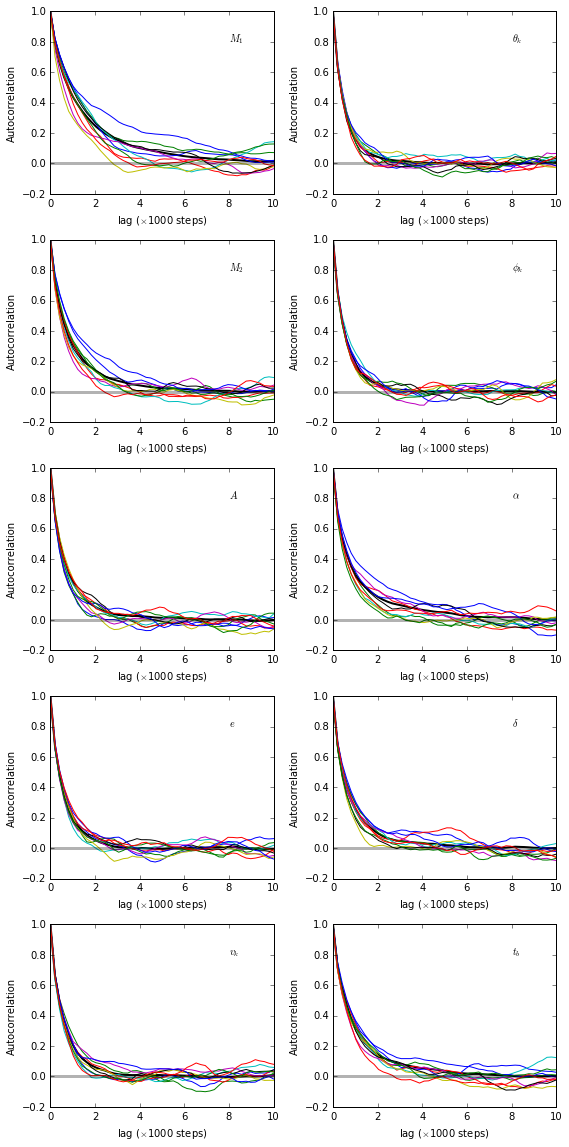

In [3]:
from pandas import Series

fig, ax = plt.subplots(5, 2, figsize=(8,16))

var = [r'$M_1$',r'$M_2$',r'$A$',r'$e$',r'$v_k$',r'$\theta_k$',r'$\phi_k$',r'$\alpha$',r'$\delta$',r'$t_b$']

N = 50

xmin, xmax = 0, 10000
factor = 1000.0

for k in np.arange(10):
    
    
    kx = k%5
    ky = k/5
    
    # Plot the autocorrelation of the flatchain
    autocorr = np.zeros(N)
    series = Series(data=sampler.flatchain.T[k])
    for i in np.arange(N):
        autocorr[i] = Series.autocorr(series, lag=int(i*float(xmax-xmin)/N))

    ax[kx,ky].plot(np.linspace(xmin,xmax,N)/factor, autocorr, color='k', linewidth=2)

        
    # Plot the autocorrelation of 10 sample chains
    for j in np.arange(10):
        autocorr = np.zeros(N)
        series = Series(data=sampler.chain[j,:,k])

        for i in np.arange(N):
            autocorr[i] = Series.autocorr(series, lag=int(i*float(xmax-xmin)/N))

        ax[kx,ky].plot(np.linspace(xmin,xmax,N)/factor, autocorr)

    
    ax[kx,ky].axhline(0.0, color='k', alpha=0.3, linewidth=3)
    ax[kx,ky].set_xlabel(r'lag ($\times$1000 steps)')
    ax[kx,ky].set_ylabel(r'Autocorrelation')
    ax[kx,ky].text(8, 0.8, var[k])
    
    
plt.tight_layout()

plt.savefig("../../figures/autocorrelation_test.pdf")
# plt.show()

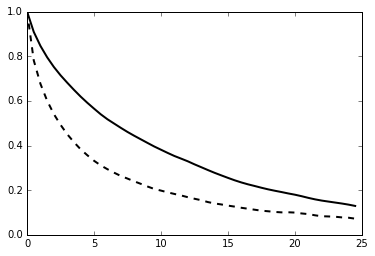

In [84]:
N = 50

# Plot the autocorrelation of the flatchain
autocorr = np.zeros(N)
series = Series(data=sampler.flatchain.T[2])
for i in np.arange(N):
    autocorr[i] = Series.autocorr(series, lag=500*i)

plt.plot((500./1000.)*np.arange(N), autocorr, color='k', linewidth=2)



autocorr = np.zeros(N)
series = Series(data=np.log10(sampler.flatchain.T[2]))
for i in np.arange(N):
    autocorr[i] = Series.autocorr(series, lag=500*i)

plt.plot((500./1000.)*np.arange(N), autocorr, color='k', linewidth=2, linestyle='--')


plt.show()

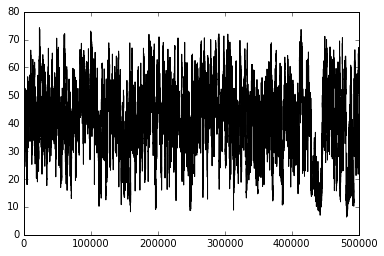

In [24]:
i, j = 10, 9

# for i in np.arange(1):
plt.plot(sampler.chain[i,:,j], color='k')
    
plt.show()

In [25]:
print sampler.acceptance_fraction

[ 0.158592  0.16165   0.161712  0.16141   0.163954  0.161232  0.161164
  0.159236  0.16266   0.160952  0.161562  0.160496  0.159864  0.160404
  0.162808  0.16014   0.156472  0.162694  0.165516  0.160518  0.158036
  0.157144  0.162202  0.156494  0.162852  0.15883   0.159918  0.161704
  0.162788  0.16065   0.156286  0.162024  0.162976  0.162958  0.160408
  0.164514  0.161922  0.16087   0.160098  0.160308]


In [26]:
print emcee.autocorr.integrated_time(sampler.chain[0,:,0])

2145.17400343
